Loading:
  VADER:    C:\Users\Admin\Desktop\Tai-Seale Lab\results\vader\vader_results_aligned.csv
  RoBERTa:  C:\Users\Admin\Desktop\Tai-Seale Lab\results\roberta\roberta_results_aligned.csv
Merged dataframe shape: (1064, 9)
   RowID                                             AE_raw  \
0      0  I am beyond frustrated. Optumrx texted me at 4...   
1      1                   I saw Dr <Redacted> on Oct 11. M   
2      2          Sometimes and they last more that 8 days    
3      3  Hmm? I thought it was 3*??? Oh jeez! I must be...   
4      4  How does that one work ? I would rather have t...   

                                            AE_clean  AE_vader  \
0  I am beyond frustrated. Optumrx texted me at 4...   -0.2960   
1                       I saw Dr [NAME] on Oct 11. M    0.0000   
2           Sometimes and they last more that 8 days    0.0000   
3  Hmm? I thought it was 3*' Oh jeez! I must be c...   -0.5374   
4  How does that one work ? I would rather have t...    0.0000   


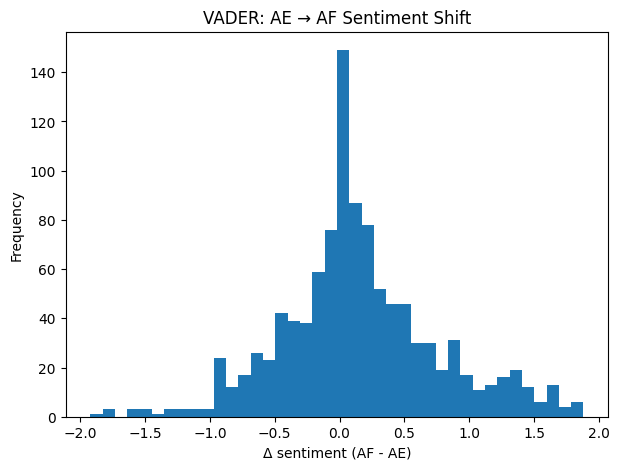

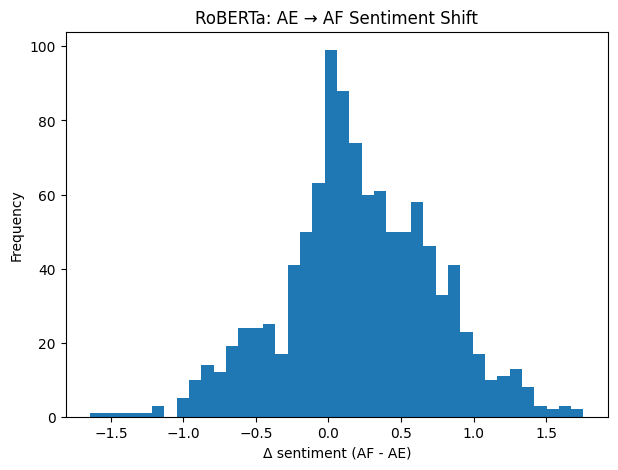

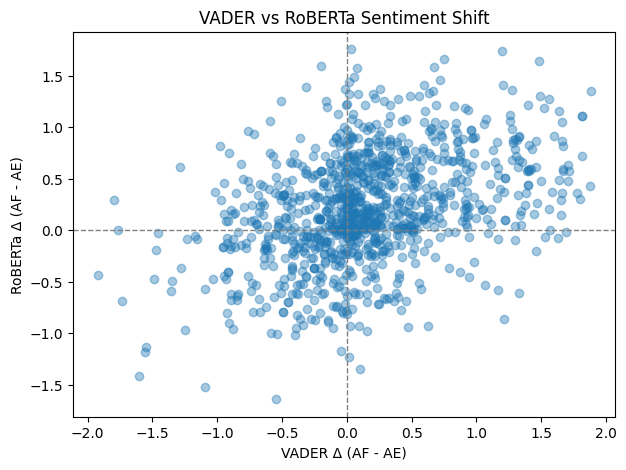

In [3]:
# 10_analysis.ipynb

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------ Path configuration ------------------------ #
BASE_DIR = Path(r"C:\Users\Admin\Desktop\Tai-Seale Lab")
RESULTS_DIR = BASE_DIR / "results"

# Paths to sentiment results
VADER_PATH = RESULTS_DIR / "vader" / "vader_results_aligned.csv"
ROBERTA_PATH = RESULTS_DIR / "roberta" / "roberta_results_aligned.csv"

print("Loading:")
print("  VADER:   ", VADER_PATH)
print("  RoBERTa: ", ROBERTA_PATH)

# ------------------------ Load both results ------------------------ #
df_vader = pd.read_csv(VADER_PATH)
df_rob = pd.read_csv(ROBERTA_PATH)

# Check RowID existence
assert "RowID" in df_vader.columns, "RowID not found in VADER file"
assert "RowID" in df_rob.columns, "RowID not found in RoBERTa file"

# ------------------------ Merge by RowID ------------------------ #
df = df_vader.merge(df_rob[["RowID", "AE_roberta", "AF_roberta"]], on="RowID", how="inner")

print("Merged dataframe shape:", df.shape)
print(df.head())

# ------------------------ Compute sentiment deltas ------------------------ #
df["AE_vader_to_AF_vader_delta"] = df["AF_vader"] - df["AE_vader"]
df["AE_rob_to_AF_rob_delta"] = df["AF_roberta"] - df["AE_roberta"]

# Model disagreement / difference (provider perspective)
df["model_diff_AF"] = df["AF_roberta"] - df["AF_vader"]

# ------------------------ Save merged table ------------------------ #
MERGED_OUT = RESULTS_DIR / "merged_sentiments.csv"
df.to_csv(MERGED_OUT, index=False)

print("Merged sentiment file saved to:", MERGED_OUT)

# ------------------------ Visualizations ------------------------ #
plt.figure(figsize=(7,5))
plt.hist(df["AE_vader_to_AF_vader_delta"], bins=40)
plt.title("VADER: AE → AF Sentiment Shift")
plt.xlabel("Δ sentiment (AF - AE)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,5))
plt.hist(df["AE_rob_to_AF_rob_delta"], bins=40)
plt.title("RoBERTa: AE → AF Sentiment Shift")
plt.xlabel("Δ sentiment (AF - AE)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(df["AE_vader_to_AF_vader_delta"], df["AE_rob_to_AF_rob_delta"], alpha=0.4)
plt.title("VADER vs RoBERTa Sentiment Shift")
plt.xlabel("VADER Δ (AF - AE)")
plt.ylabel("RoBERTa Δ (AF - AE)")
plt.axhline(0, color="grey", linestyle="--", linewidth=1)
plt.axvline(0, color="grey", linestyle="--", linewidth=1)
plt.show()


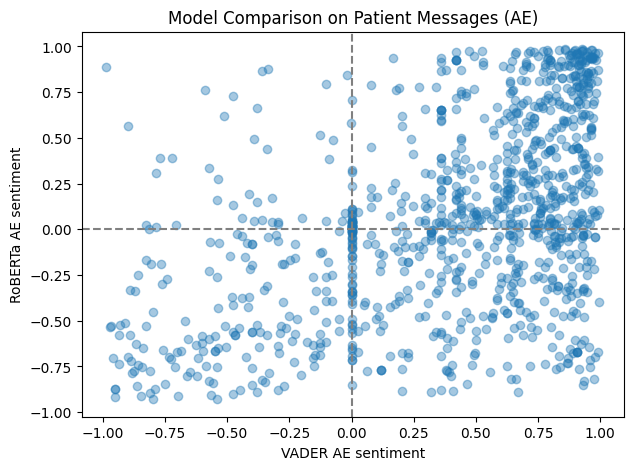

In [2]:
plt.figure(figsize=(7,5))
plt.scatter(df["AE_vader"], df["AE_roberta"], alpha=0.4)
plt.xlabel("VADER AE sentiment")
plt.ylabel("RoBERTa AE sentiment")
plt.title("Model Comparison on Patient Messages (AE)")
plt.axhline(0, color="grey", linestyle="--")
plt.axvline(0, color="grey", linestyle="--")
plt.show()


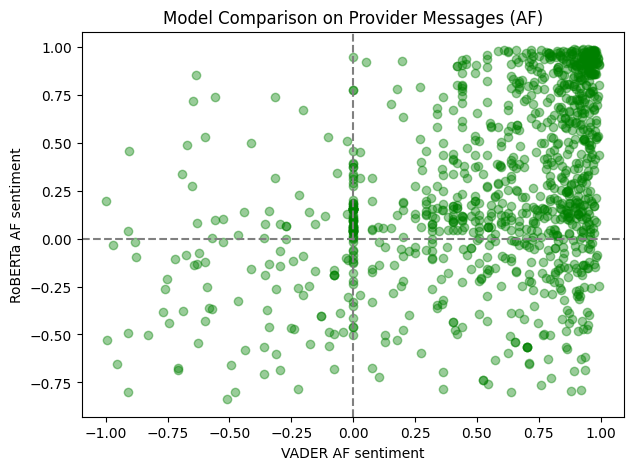

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(df["AF_vader"], df["AF_roberta"], alpha=0.4, color="green")
plt.xlabel("VADER AF sentiment")
plt.ylabel("RoBERTa AF sentiment")
plt.title("Model Comparison on Provider Messages (AF)")
plt.axhline(0, color="grey", linestyle="--")
plt.axvline(0, color="grey", linestyle="--")
plt.show()


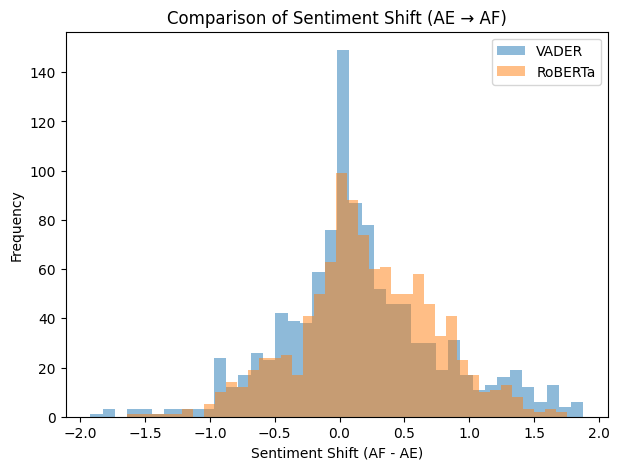

In [4]:
plt.figure(figsize=(7,5))
plt.hist(df["AE_vader_to_AF_vader_delta"], bins=40, alpha=0.5, label="VADER")
plt.hist(df["AE_rob_to_AF_rob_delta"], bins=40, alpha=0.5, label="RoBERTa")
plt.xlabel("Sentiment Shift (AF - AE)")
plt.ylabel("Frequency")
plt.title("Comparison of Sentiment Shift (AE → AF)")
plt.legend()
plt.show()


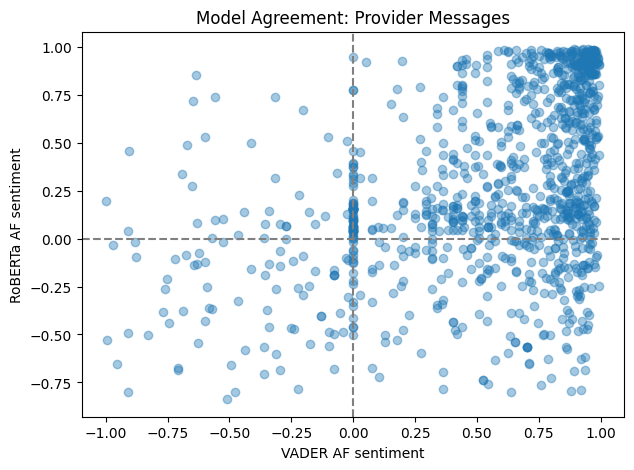

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(df["AF_vader"], df["AF_roberta"], alpha=0.4)
plt.title("Model Agreement: Provider Messages")
plt.xlabel("VADER AF sentiment")
plt.ylabel("RoBERTa AF sentiment")
plt.axhline(0, linestyle='--', color='grey')
plt.axvline(0, linestyle='--', color='grey')
plt.show()


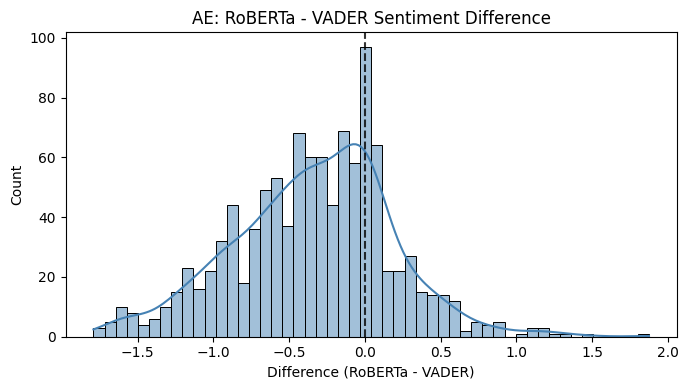

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Difference calculation ----
df['AE_diff'] = df['AE_roberta'] - df['AE_vader']

plt.figure(figsize=(7, 4))
sns.histplot(df['AE_diff'], bins=50, kde=True, color='steelblue')
plt.axvline(0, color='black', linestyle='--', alpha=0.8)

plt.title("AE: RoBERTa - VADER Sentiment Difference")
plt.xlabel("Difference (RoBERTa - VADER)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


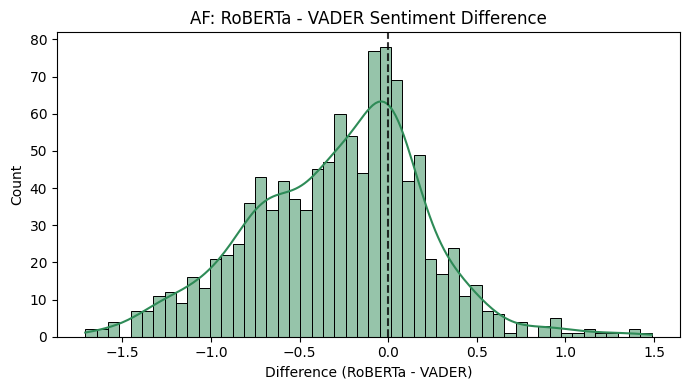

In [7]:
df['AF_diff'] = df['AF_roberta'] - df['AF_vader']

plt.figure(figsize=(7, 4))
sns.histplot(df['AF_diff'], bins=50, kde=True, color='seagreen')
plt.axvline(0, color='black', linestyle='--', alpha=0.8)
plt.title("AF: RoBERTa - VADER Sentiment Difference")
plt.xlabel("Difference (RoBERTa - VADER)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


VADER columns: ['AE_vader', 'AF_vader']
RoBERTa columns: ['AE_roberta', 'AF_roberta']

=== AE - VADER ===
Counts:
AE_vader_label
neg    189
neu     83
pos    792
Name: count, dtype: int64

Proportions:
AE_vader_label
neg    0.178
neu    0.078
pos    0.744
Name: proportion, dtype: float64

=== AE - RoBERTa ===
Counts:
AE_roberta_label
neg    288
neu    435
pos    341
Name: count, dtype: int64

Proportions:
AE_roberta_label
neg    0.271
neu    0.409
pos    0.320
Name: proportion, dtype: float64

=== AF - VADER ===
Counts:
AF_vader_label
neg     98
neu     85
pos    881
Name: count, dtype: int64

Proportions:
AF_vader_label
neg    0.092
neu    0.080
pos    0.828
Name: proportion, dtype: float64

=== AF - RoBERTa ===
Counts:
AF_roberta_label
neg    116
neu    478
pos    470
Name: count, dtype: int64

Proportions:
AF_roberta_label
neg    0.109
neu    0.449
pos    0.442
Name: proportion, dtype: float64


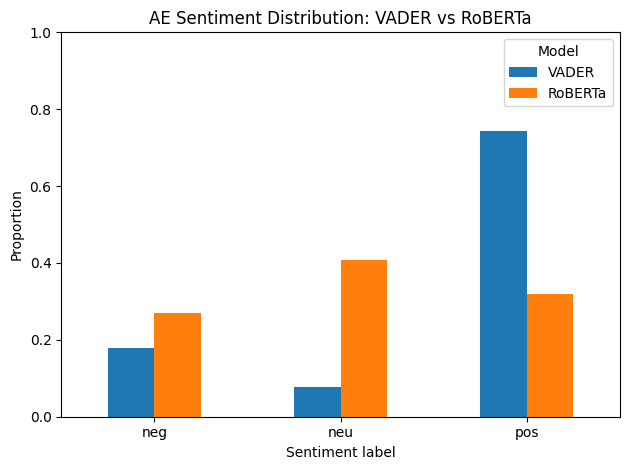

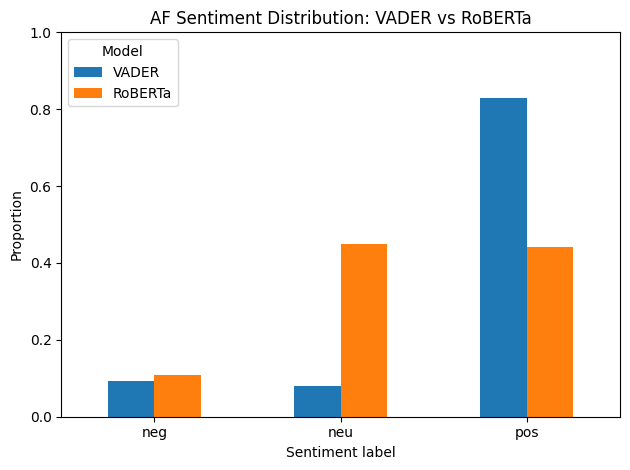

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load data
# -----------------------------
vader_path = r"C:\Users\Admin\Desktop\Tai-Seale Lab\results\vader\vader_results_aligned.csv"
roberta_path = r"C:\Users\Admin\Desktop\Tai-Seale Lab\results\roberta\roberta_results_aligned.csv"

df_vader = pd.read_csv(vader_path)
df_roberta = pd.read_csv(roberta_path)

# Make sure the key columns exist
print("VADER columns:", [c for c in df_vader.columns if "vader" in c.lower()])
print("RoBERTa columns:", [c for c in df_roberta.columns if "roberta" in c.lower()])

# -----------------------------
# 2. Define labeling functions
# -----------------------------
def vader_label(score, pos_th=0.05, neg_th=-0.05):
    """Label VADER compound score as pos/neu/neg."""
    if pd.isna(score):
        return "neu"
    if score >= pos_th:
        return "pos"
    elif score <= neg_th:
        return "neg"
    else:
        return "neu"

def roberta_label(score, pos_th=0.3, neg_th=-0.3):
    """Label RoBERTa score = P(pos) - P(neg) as pos/neu/neg."""
    if pd.isna(score):
        return "neu"
    if score >= pos_th:
        return "pos"
    elif score <= neg_th:
        return "neg"
    else:
        return "neu"

# -----------------------------
# 3. Add labels for AE and AF
# -----------------------------

# VADER labels
df_vader["AE_vader_label"] = df_vader["AE_vader"].apply(vader_label)
df_vader["AF_vader_label"] = df_vader["AF_vader"].apply(vader_label)

# RoBERTa labels
df_roberta["AE_roberta_label"] = df_roberta["AE_roberta"].apply(roberta_label)
df_roberta["AF_roberta_label"] = df_roberta["AF_roberta"].apply(roberta_label)

# -----------------------------
# 4. Count and proportion tables
# -----------------------------
def print_counts_and_props(name, series):
    """Pretty-print counts and proportions for a labeled series."""
    counts = series.value_counts().reindex(["neg", "neu", "pos"], fill_value=0)
    props = series.value_counts(normalize=True).reindex(["neg", "neu", "pos"], fill_value=0.0)
    print(f"\n=== {name} ===")
    print("Counts:")
    print(counts)
    print("\nProportions:")
    print(props.round(3))

# AE
print_counts_and_props("AE - VADER", df_vader["AE_vader_label"])
print_counts_and_props("AE - RoBERTa", df_roberta["AE_roberta_label"])

# AF
print_counts_and_props("AF - VADER", df_vader["AF_vader_label"])
print_counts_and_props("AF - RoBERTa", df_roberta["AF_roberta_label"])

# -----------------------------
# 5. Prepare data for plotting
# -----------------------------
# Build small DataFrames for plotting: rows = sentiment, cols = model
sentiments = ["neg", "neu", "pos"]

ae_vader_props = df_vader["AE_vader_label"].value_counts(normalize=True).reindex(sentiments, fill_value=0.0)
ae_roberta_props = df_roberta["AE_roberta_label"].value_counts(normalize=True).reindex(sentiments, fill_value=0.0)

af_vader_props = df_vader["AF_vader_label"].value_counts(normalize=True).reindex(sentiments, fill_value=0.0)
af_roberta_props = df_roberta["AF_roberta_label"].value_counts(normalize=True).reindex(sentiments, fill_value=0.0)

ae_plot_df = pd.DataFrame({
    "VADER": ae_vader_props,
    "RoBERTa": ae_roberta_props
}, index=sentiments)

af_plot_df = pd.DataFrame({
    "VADER": af_vader_props,
    "RoBERTa": af_roberta_props
}, index=sentiments)

# -----------------------------
# 6. Plot: side-by-side bar charts
# -----------------------------
def plot_comparison(df_props, title):
    """Bar chart comparing VADER vs RoBERTa sentiment proportions."""
    ax = df_props.plot(kind="bar")
    ax.set_xlabel("Sentiment label")
    ax.set_ylabel("Proportion")
    ax.set_title(title)
    ax.set_ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

# AE: patient messages
plot_comparison(ae_plot_df, "AE Sentiment Distribution: VADER vs RoBERTa")

# AF: provider replies
plot_comparison(af_plot_df, "AF Sentiment Distribution: VADER vs RoBERTa")


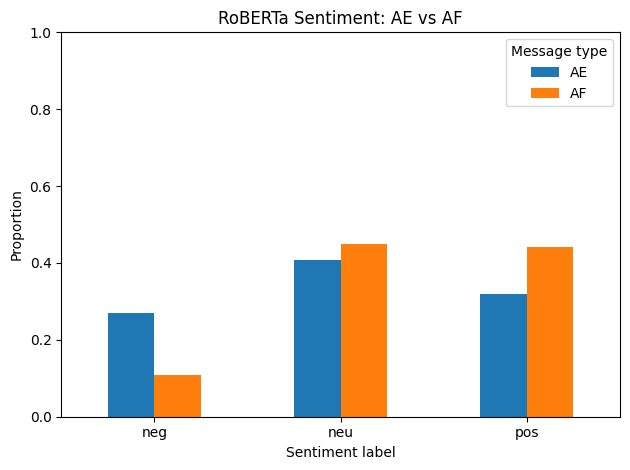

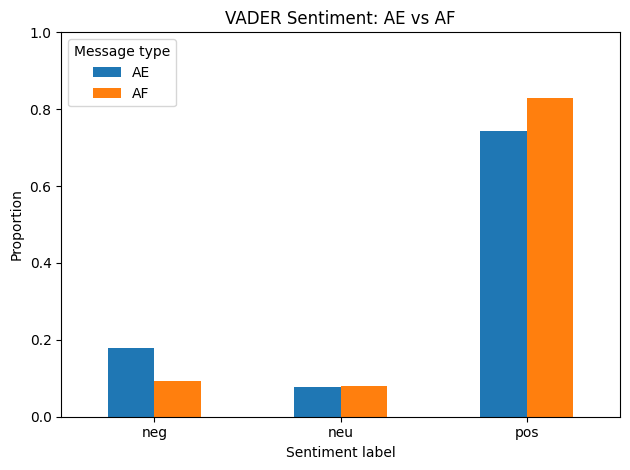

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

sentiments = ["neg", "neu", "pos"]


vader_df = pd.DataFrame({
    "AE": ae_vader_props.reindex(sentiments),
    "AF": af_vader_props.reindex(sentiments),
}, index=sentiments)

roberta_df = pd.DataFrame({
    "AE": ae_roberta_props.reindex(sentiments),
    "AF": af_roberta_props.reindex(sentiments),
}, index=sentiments)

def plot_ae_af(df_props, title):
    ax = df_props.plot(kind="bar")
    ax.set_xlabel("Sentiment label")
    ax.set_ylabel("Proportion")
    ax.set_title(title)
    ax.set_ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(title="Message type")
    plt.tight_layout()
    plt.show()

# RoBERTa：重点看医生 vs 患者
plot_ae_af(roberta_df, "RoBERTa Sentiment: AE vs AF")

# VADER：展示“整体偏得更正面”
plot_ae_af(vader_df, "VADER Sentiment: AE vs AF")
